# SURUTHI S
# 225229141

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from kerastuner.tuners import RandomSearch
import keras
import keras_tuner
from kerastuner.tuners import Hyperband
import matplotlib.pyplot as plt

<ipython-input-3-0afa839d41ea>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Split the training data into training and validation sets
validation_split = 0.2  # You can adjust this split ratio as needed

# Calculate the number of samples to use for validation
num_validation_samples = int(validation_split * len(x_train_full))

# Split the training data into training and validation sets
x_train = x_train_full[:-num_validation_samples]
y_train = y_train_full[:-num_validation_samples]

x_val = x_train_full[-num_validation_samples:]
y_val = y_train_full[-num_validation_samples:]


# Reshape the data to match the input shape expected by the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
len(x_train),len(x_test)

# 60000 for training
# 10000 for testing

(48000, 10000)

In [ ]:
x_train[2].dtype

dtype('uint8')

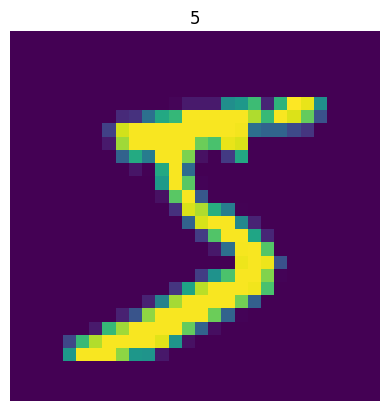

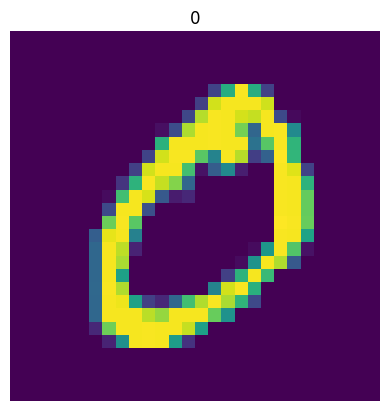

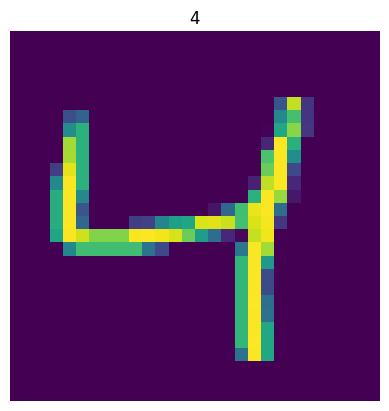

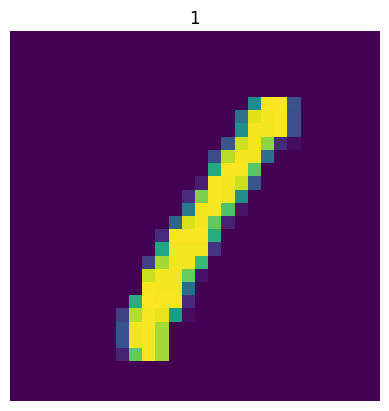

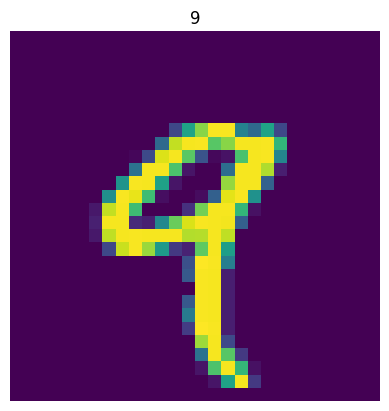

In [ ]:
for i in range(5):
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis("off")
  plt.show()

In [ ]:
x_train[1].shape

(28, 28, 1)

In [ ]:
INPUT_DIM =  (28,28,1)

In [ ]:
model_baseline = tf.keras.Sequential()
model_baseline.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation = 'relu',
                        input_shape = INPUT_DIM
                        ))
model_baseline.add(layers.Flatten())
model_baseline.add(layers.Dense(10,activation = 'softmax'))

model_baseline.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_bl = model_baseline.fit(x_train,y_train,epochs = 5,validation_split = 0.10)

Epoch 1/5
1350/1350 [==============================] - 20s 5ms/step - loss: 1.3541 - accuracy: 0.9292 - val_loss: 0.1764 - val_accuracy: 0.9579
Epoch 2/5
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0811 - accuracy: 0.9756 - val_loss: 0.1778 - val_accuracy: 0.9546
Epoch 3/5
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0626 - accuracy: 0.9803 - val_loss: 0.1848 - val_accuracy: 0.9590
Epoch 4/5
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.2252 - val_accuracy: 0.9592
Epoch 5/5
1350/1350 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.2066 - val_accuracy: 0.9592


In [ ]:
def accuracy_plot(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(" Accuracy ")
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.legend(['Train',"Test"])
  plt.show()

def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(" Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


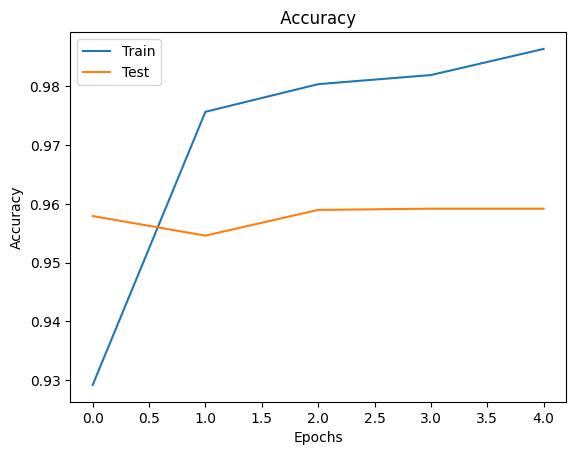

In [ ]:
accuracy_plot(history_bl)

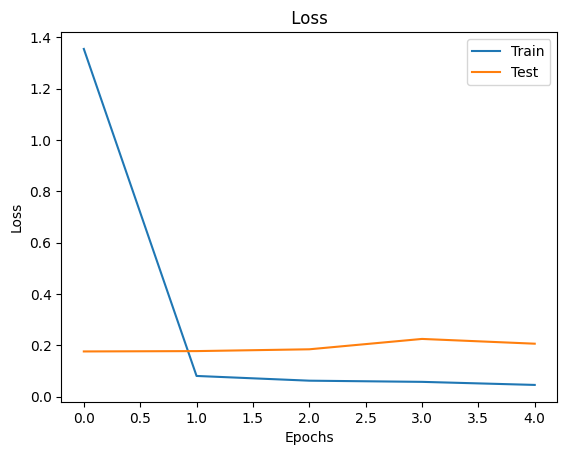

In [ ]:
loss_plot(history_bl)

# 1. Number of Filters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

In [ ]:
# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Split the training data into training and validation sets
validation_split = 0.2  # You can adjust this split ratio as needed

# Calculate the number of samples to use for validation
num_validation_samples = int(validation_split * len(x_train_full))

# Split the training data into training and validation sets
x_train = x_train_full[:-num_validation_samples]
y_train = y_train_full[:-num_validation_samples]

x_val = x_train_full[-num_validation_samples:]
y_val = y_train_full[-num_validation_samples:]

# Normalize the pixel values to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to match the input shape expected by the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))


In [ ]:
def build_model_filters(hp):
    model = keras.Sequential()

    # Tune the number of filters in the first convolutional layer
    hp_filters = hp.Choice('filters', values=[4, 32, 128, 512, 2056])
    model.add(layers.Conv2D(filters=hp_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Initialize the tuner
tuner_filters = RandomSearch(
    build_model_filters,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)

In [ ]:
#  Search for the best hyperparameters
tuner_filters.search(x_train, y_train_full, epochs=5, validation_split=0.2)


Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9748958349227905

Best val_accuracy So Far: 0.9748958349227905
Total elapsed time: 00h 05m 51s


In [ ]:
# Train the final model
# Get the best hyperparameters and build the final model
best_hps = tuner_filters.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_filters(best_hps)

# Train the final model
best_model.fit(x_train, y_train_full, epochs=5, validation_split=0.2)



Epoch 1/5
1200/1200 [==============================] - 5s 3ms/step - loss: 0.2244 - accuracy: 0.9345 - val_loss: 0.1223 - val_accuracy: 0.9643
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.0884 - val_accuracy: 0.9719
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.0907 - val_accuracy: 0.9719
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 0.0897 - val_accuracy: 0.9712
Epoch 5/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0869 - val_accuracy: 0.9745


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9806
Test accuracy: 0.9805999994277954


# 2.Number of Layers

In [ ]:
def build_model_layers(hp):
    model = keras.Sequential()

    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=4, step=1)

    # Add convolutional layers based on the hyperparameter
    for i in range(num_conv_layers):
        model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner_layers = RandomSearch(
    build_model_layers,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)

In [ ]:
tuner_layers.search(x_train, y_train_full, epochs=5, validation_split=0.2)

In [ ]:
best_hps = tuner_layers.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_layers(best_hps)

In [ ]:

# Train the final model
best_model.fit(x_train, y_train_full, epochs=10, validation_split=0.2)


Epoch 1/10
1200/1200 [==============================] - 5s 3ms/step - loss: 0.2164 - accuracy: 0.9367 - val_loss: 0.1058 - val_accuracy: 0.9675
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 0.0969 - val_accuracy: 0.9696
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0809 - val_accuracy: 0.9746
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.0917 - val_accuracy: 0.9747
Epoch 7/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.0954 - val_accuracy:

In [ ]:

# Train the final model
best_model.fit(x_train, y_train_full, epochs=10, validation_split=0.2)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.1231 - val_accuracy: 0.9740
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.1191 - val_accuracy: 0.9756
Epoch 3/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1227 - val_accuracy: 0.9755
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1306 - val_accuracy: 0.9741
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1290 - val_accuracy: 0.9753
Epoch 6/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1244 - val_accuracy: 0.9777
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1662 - val_accuracy:

# Size of filters

In [ ]:
def build_model_kernel(hp):
  model = keras.Sequential()
  hp_filter_size = hp.Int('filter_size_' + str(i), min_value=3, max_value=7, step=2)

  model.add(keras.layers.Conv2D(filters=16, kernel_size=(hp_filter_size, hp_filter_size), activation='relu', input_shape=(28, 28, 1)))
  model.add(keras.layers.Conv2D(filters=16, kernel_size=(hp_filter_size, hp_filter_size), activation='relu', input_shape=(28, 28, 1)))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
tuner_kernel = RandomSearch(
    build_model_kernel,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)

In [ ]:
# Search for the best hyperparameters
tuner_kernel.search(x_train, y_train_full, epochs=5, validation_split=0.2)

In [ ]:
# Get the best hyperparameters and build the final model
best_hps = tuner_kernel.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_kernel(best_hps)

# Activation Function

In [ ]:
def build_model_act(hp):
    model = keras.Sequential()

    # First convolutional layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
                                  activation=hp.Choice('activation_1', values=['relu', 'sigmoid', 'tanh']),
                                  input_shape=(28, 28, 1)))


    # Second convolutional layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
                                  activation=hp.Choice('activation_2', values=['relu', 'sigmoid', 'tanh'])))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Initialize the tuner
tuner_act = RandomSearch(
    build_model_act,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)


In [ ]:
tuner_act.search(x_train, y_train_full, epochs=5, validation_split=0.2)

# Get the best hyperparameters and build the final model
best_hps = tuner_act.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_act(best_hps)

Trial 9 Complete [00h 00m 42s]
val_accuracy: 0.96875

Best val_accuracy So Far: 0.9785416722297668
Total elapsed time: 00h 06m 03s


In [ ]:
history_act = best_model.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3195 - accuracy: 0.9047 - val_loss: 0.1108 - val_accuracy: 0.9647
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0891 - accuracy: 0.9721 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.0978 - val_accuracy: 0.9711
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0876 - val_accuracy: 0.9762
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0912 - val_accuracy: 0.9735


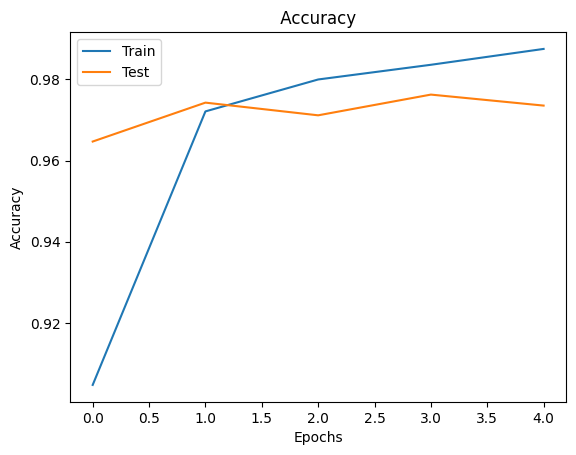

In [ ]:
accuracy_plot(history_act)

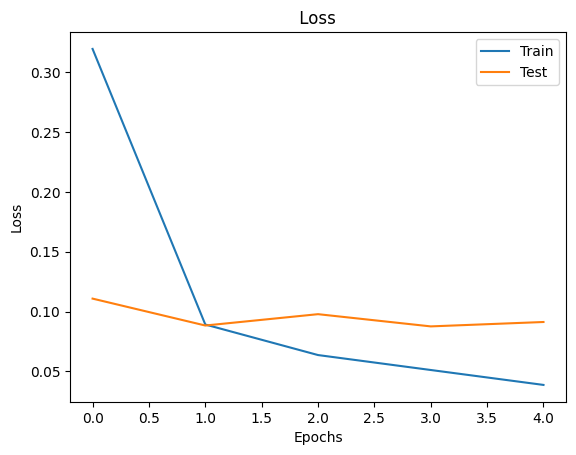

In [ ]:
loss_plot(history_act)

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9800
Test accuracy: 0.9800000190734863


# Filter Size Combinations

In [ ]:
def build_model_filter_size(hp):
    model = keras.Sequential()

    # First convolutional layer with 3x3 kernel size
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=(28, 28, 1)))

    # Second convolutional layer with 5x5 kernel size
    model.add(keras.layers.Conv2D(filters=16,
                                  kernel_size=(5, 5),
                                  activation='relu'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Initialize the tuner
tuner_act = RandomSearch(
    build_model_act,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)


In [ ]:
tuner_act.search(x_train, y_train_full, epochs=5, validation_split=0.2)

# Get the best hyperparameters and build the final model
best_hps = tuner_act.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_act(best_hps)

In [ ]:
history_filter = best_model.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3129 - accuracy: 0.9099 - val_loss: 0.1195 - val_accuracy: 0.9634
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0944 - accuracy: 0.9705 - val_loss: 0.1004 - val_accuracy: 0.9693
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.1047 - val_accuracy: 0.9682
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0875 - val_accuracy: 0.9740
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0915 - val_accuracy: 0.9739


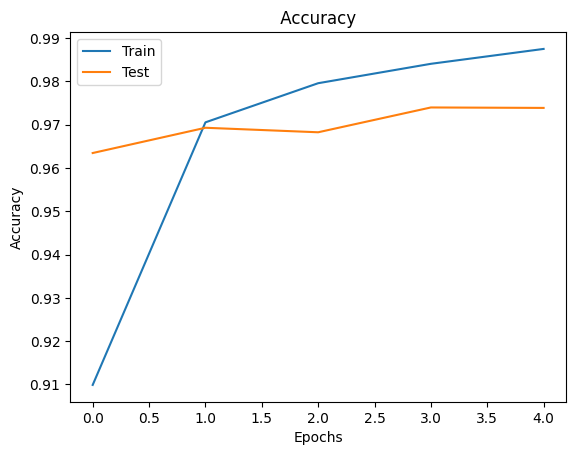

In [ ]:
accuracy_plot(history_filter)

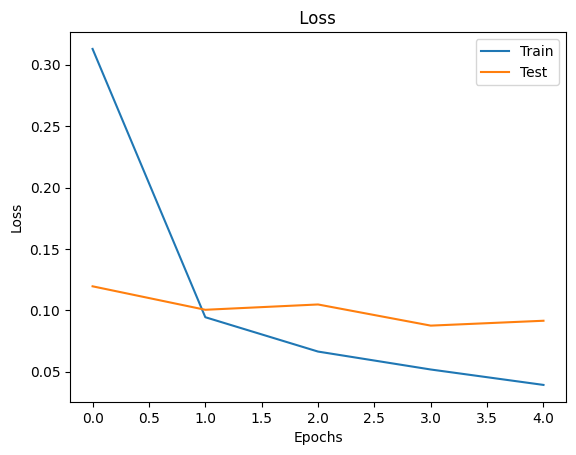

In [ ]:
loss_plot(history_filter)

## Layer Filter Combination

In [ ]:
def build_model_layer_filter(hp):
    model = keras.Sequential()

    # Tune the number of filters for the first convolutional layer
    hp_filters_1 = hp.Choice('filters_1', values=[16, 32, 64])

    model.add(layers.Conv2D(filters=hp_filters_1, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    # Tune the number of filters for the second convolutional layer
    hp_filters_2 = hp.Choice('filters_2', values=[32, 64, 128])

    model.add(layers.Conv2D(filters=hp_filters_2, kernel_size=(3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Initialize the tuner
tuner_layer_filter = RandomSearch(
    build_model_layer_filter,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)


In [ ]:
tuner_layer_filter.search(x_train, y_train_full, epochs=5, validation_split=0.2)

# Get the best hyperparameters and build the final model
best_hps = tuner_layer_filter.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_layer_filter(best_hps)

In [ ]:
history_layer = best_model.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.7129 - accuracy: 0.9417 - val_loss: 0.1342 - val_accuracy: 0.9602
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0567 - accuracy: 0.9834 - val_loss: 0.1181 - val_accuracy: 0.9698
Epoch 3/5
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.1544 - val_accuracy: 0.9628
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.1077 - val_accuracy: 0.9760
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.1400 - val_accuracy: 0.9722


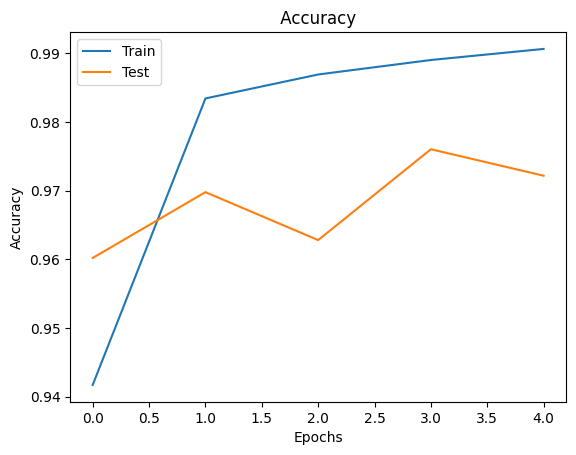

In [ ]:
accuracy_plot(history_layer)

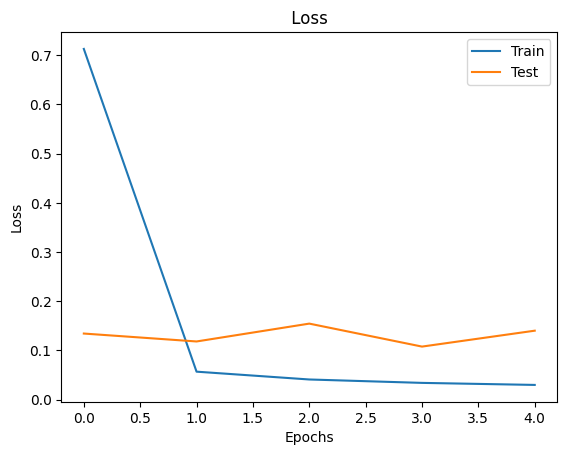

In [ ]:
loss_plot(history_layer)

Influence of Striding

In [ ]:
def build_model_stride(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('filters', min_value=16, max_value=64, step=16),
            kernel_size=hp.Choice('kernel_size', values=[(5, 5), (7, 7)]),
            activation='relu',
            input_shape=(28, 28, 1)
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner_stride = RandomSearch(
    build_model_stride,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='my_tuning_directory',
    project_name='mnist_cnn_tuning'
)

In [ ]:
tuner_stride.search(x_train, y_train_full, epochs=5, validation_split=0.2)

# Get the best hyperparameters and build the final model
best_hps = tuner_stride.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model_stride(best_hps)

#Padding

In [ ]:
# Define a model builder function
def build_model_pad(use_padding, filter_size):
    model = keras.Sequential()

    # Set padding
    padding = 'valid' if not use_padding else 'same'

    # First convolutional layer
    model.add(keras.layers.Conv2D(32, (filter_size, filter_size), activation='relu', padding=padding, input_shape=(28, 28, 1)))

    # Second convolutional layer
    model.add(keras.layers.Conv2D(32, (filter_size, filter_size), activation='relu', padding=padding))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Run the model without padding and with 3x3 filter size
model_no_padding_3x3 = build_model_pad(use_padding=False, filter_size=3)

# Train the model for five epochs
model_no_padding_3x3.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model_no_padding_3x3.evaluate(x_test, y_test)
print("Test accuracy (no padding, 3x3 filter size):", test_acc)

Epoch 1/5
1200/1200 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.9382 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0784 - accuracy: 0.9767 - val_loss: 0.1230 - val_accuracy: 0.9682
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.1193 - val_accuracy: 0.9707
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.1465 - val_accuracy: 0.9654
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9735
Test accuracy (no padding, 3x3 filter size): 0.9735000133514404


In [ ]:

# Run the model with padding and with 3x3 filter size
model_padding_3x3 = build_model_pad(use_padding=True, filter_size=3)

# Train the model for five epochs
model_padding_3x3.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model_padding_3x3.evaluate(x_test, y_test)
print("Test accuracy (padding, 3x3 filter size):", test_acc)

Epoch 1/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3106 - accuracy: 0.9450 - val_loss: 0.1156 - val_accuracy: 0.9671
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.1340 - val_accuracy: 0.9656
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.1405 - val_accuracy: 0.9671
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.1414 - val_accuracy: 0.9693
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1582 - accuracy: 0.9720
Test accuracy (padding, 3x3 filter size): 0.972000002861023


In [ ]:
# Run the model with padding and with 5x5 filter size
model_padding_5x5 = build_model_pad(use_padding=True, filter_size=5)

# Train the model for five epochs
model_padding_5x5.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model_padding_5x5.evaluate(x_test, y_test)
print("Test accuracy (padding, 5x5 filter size):", test_acc)

Epoch 1/5
1200/1200 [==============================] - 6s 4ms/step - loss: 0.3225 - accuracy: 0.9436 - val_loss: 0.1193 - val_accuracy: 0.9643
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0757 - accuracy: 0.9776 - val_loss: 0.1216 - val_accuracy: 0.9656
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0596 - accuracy: 0.9814 - val_loss: 0.1329 - val_accuracy: 0.9684
Epoch 4/5
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.1628 - val_accuracy: 0.9645
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9649
Test accuracy (padding, 5x5 filter size): 0.964900016784668


In [ ]:
# Run the model with padding and with 7x7 filter size
model_padding_7x7 = build_model_pad(use_padding=True, filter_size=7)

# Train the model for five epochs
model_padding_7x7.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model_padding_7x7.evaluate(x_test, y_test)
print("Test accuracy (padding, 7x7 filter size):", test_acc)


Epoch 1/5
1200/1200 [==============================] - 12s 7ms/step - loss: 0.3496 - accuracy: 0.9382 - val_loss: 0.1043 - val_accuracy: 0.9658
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0904 - accuracy: 0.9730 - val_loss: 0.1116 - val_accuracy: 0.9692
Epoch 3/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0730 - accuracy: 0.9787 - val_loss: 0.1252 - val_accuracy: 0.9688
Epoch 4/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.0580 - accuracy: 0.9832 - val_loss: 0.1259 - val_accuracy: 0.9690
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1480 - accuracy: 0.9707
Test accuracy (padding, 7x7 filter size): 0.9707000255584717


#Influence of Pooling

In [ ]:
# Define a model builder function
def build_model_pool(pooling_size):
    model = keras.Sequential()

    # First convolutional layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # Max-pooling layer with specified pooling size
    model.add(keras.layers.MaxPooling2D(pool_size=(pooling_size, pooling_size)))

    # Second convolutional layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

    # Max-pooling layer with the same pooling size as the first one
    model.add(keras.layers.MaxPooling2D(pool_size=(pooling_size, pooling_size)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Define a list of pooling sizes to test
pooling_sizes = [2, 3, 5, 7]

# Train and evaluate models with different pooling sizes
for pooling_size in pooling_sizes:
    model = build_model_pool(pooling_size)

    # Train the model for 5 epochs
    model.fit(x_train, y_train_full, epochs=5, validation_split=0.2)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy (pooling size {pooling_size}x{pooling_size}): {test_acc}")

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6692 - accuracy: 0.9072 - val_loss: 0.1135 - val_accuracy: 0.9683
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0946 - accuracy: 0.9721 - val_loss: 0.1276 - val_accuracy: 0.9635
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0929 - val_accuracy: 0.9744
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0890 - val_accuracy: 0.9757
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9789
Test accuracy (pooling size 2x2): 0.9789000153541565
Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 1.3239 - accuracy: 0.8466 - val_loss: 0.2694 - val_accuracy: 0.9317
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2032 - accuracy: 0.9468 - val_loss: 0.2066 - val_accurac

ValueError: ignored